In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
len(df['quality'].unique())

6

In [7]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [10]:
df.duplicated().sum()

240

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(1359, 12)

In [16]:
df.duplicated().sum()

0

In [17]:
X = df.drop("quality",axis=1)

In [18]:
y = df['quality']

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
model.score(X_train,y_train)

1.0

[Text(0.5070754716981132, 0.9166666666666666, 'X[10] <= 9.925\ngini = 0.643\nsamples = 951\nvalue = [7, 31, 408, 376, 117, 12]'),
 Text(0.2641509433962264, 0.75, 'X[6] <= 58.5\ngini = 0.458\nsamples = 400\nvalue = [2, 13, 275, 104, 6, 0]'),
 Text(0.1509433962264151, 0.5833333333333334, 'X[1] <= 0.548\ngini = 0.548\nsamples = 225\nvalue = [2, 9, 128, 80, 6, 0]'),
 Text(0.07547169811320754, 0.4166666666666667, 'X[9] <= 0.585\ngini = 0.572\nsamples = 112\nvalue = [1, 2, 48, 55, 6, 0]'),
 Text(0.03773584905660377, 0.25, 'X[5] <= 8.5\ngini = 0.46\nsamples = 35\nvalue = [0, 2, 24, 9, 0, 0]'),
 Text(0.018867924528301886, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05660377358490566, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.11320754716981132, 0.25, 'X[0] <= 11.35\ngini = 0.54\nsamples = 77\nvalue = [1, 0, 24, 46, 6, 0]'),
 Text(0.09433962264150944, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.1320754716981132, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.22641509433962265, 0.41666

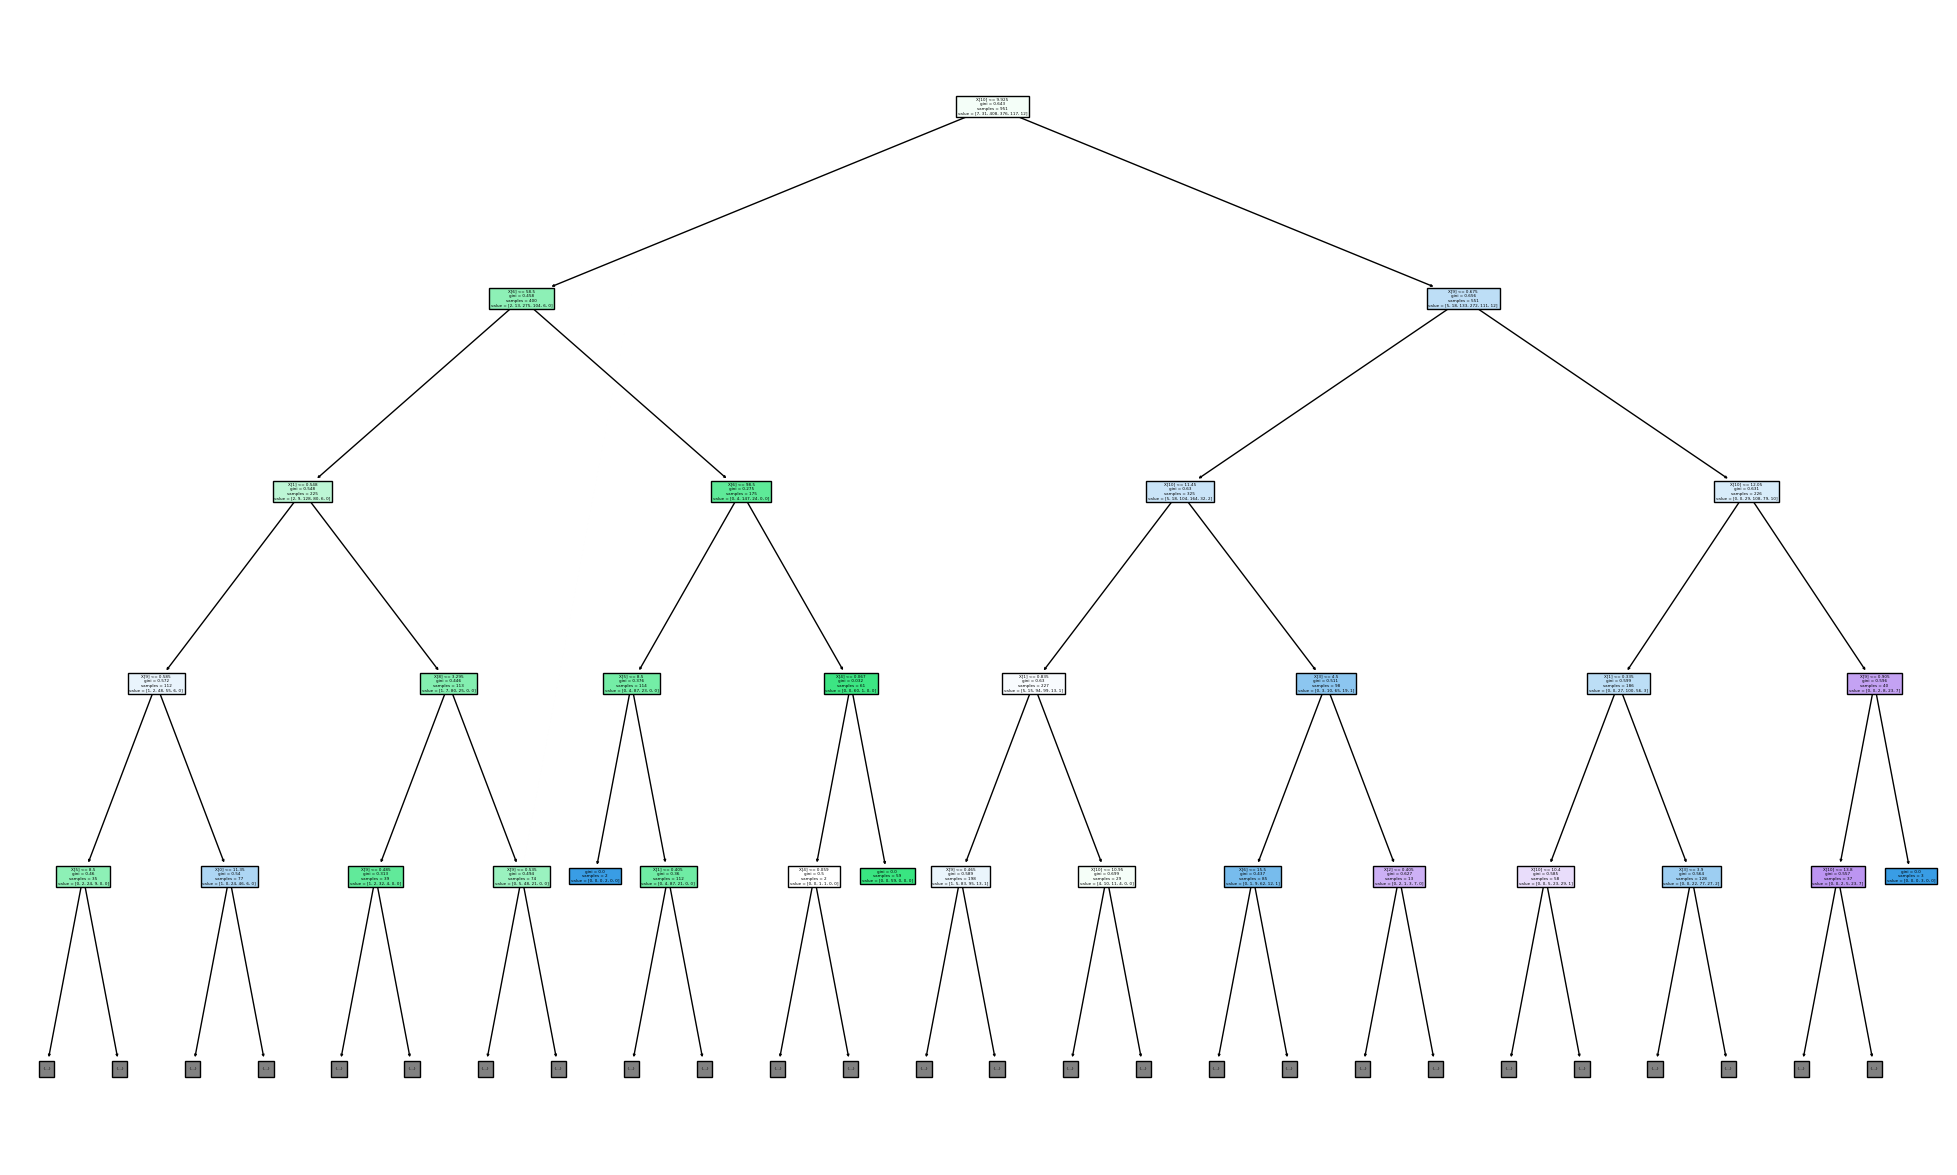

In [25]:
##### Visualise Decision Tree

from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model, max_depth=4,filled=True)

In [26]:
fig.savefig("decistion_tree_classifier.png")

In [27]:
y_predict = model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test,y_predict)

0.4264705882352941

In [31]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,8,1),
    'min_samples_split': range(2,8,1),
    'splitter' : ['best', 'random']
    
}

In [33]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=grid_param, cv=3, verbose=1)

In [35]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 1344 candidates, totalling 4032 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 8),
                         'splitter': ['best', 'random']},
             verbose=1)

In [37]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'splitter': 'best'}

In [38]:
model_with_best_params=DecisionTreeClassifier(criterion= 'gini',max_depth= 4,min_samples_leaf= 7,min_samples_split= 4,splitter='best')

In [39]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=7, min_samples_split=4)

[Text(0.5, 0.9, 'X[10] <= 9.925\ngini = 0.643\nsamples = 951\nvalue = [7, 31, 408, 376, 117, 12]'),
 Text(0.25, 0.7, 'X[6] <= 58.5\ngini = 0.458\nsamples = 400\nvalue = [2, 13, 275, 104, 6, 0]'),
 Text(0.125, 0.5, 'X[1] <= 0.548\ngini = 0.548\nsamples = 225\nvalue = [2, 9, 128, 80, 6, 0]'),
 Text(0.0625, 0.3, 'X[9] <= 0.585\ngini = 0.572\nsamples = 112\nvalue = [1, 2, 48, 55, 6, 0]'),
 Text(0.03125, 0.1, 'gini = 0.46\nsamples = 35\nvalue = [0, 2, 24, 9, 0, 0]'),
 Text(0.09375, 0.1, 'gini = 0.54\nsamples = 77\nvalue = [1, 0, 24, 46, 6, 0]'),
 Text(0.1875, 0.3, 'X[8] <= 3.295\ngini = 0.446\nsamples = 113\nvalue = [1, 7, 80, 25, 0, 0]'),
 Text(0.15625, 0.1, 'gini = 0.313\nsamples = 39\nvalue = [1, 2, 32, 4, 0, 0]'),
 Text(0.21875, 0.1, 'gini = 0.494\nsamples = 74\nvalue = [0, 5, 48, 21, 0, 0]'),
 Text(0.375, 0.5, 'X[6] <= 98.5\ngini = 0.275\nsamples = 175\nvalue = [0, 4, 147, 24, 0, 0]'),
 Text(0.3125, 0.3, 'X[1] <= 0.405\ngini = 0.376\nsamples = 114\nvalue = [0, 4, 87, 23, 0, 0]'),
 Text

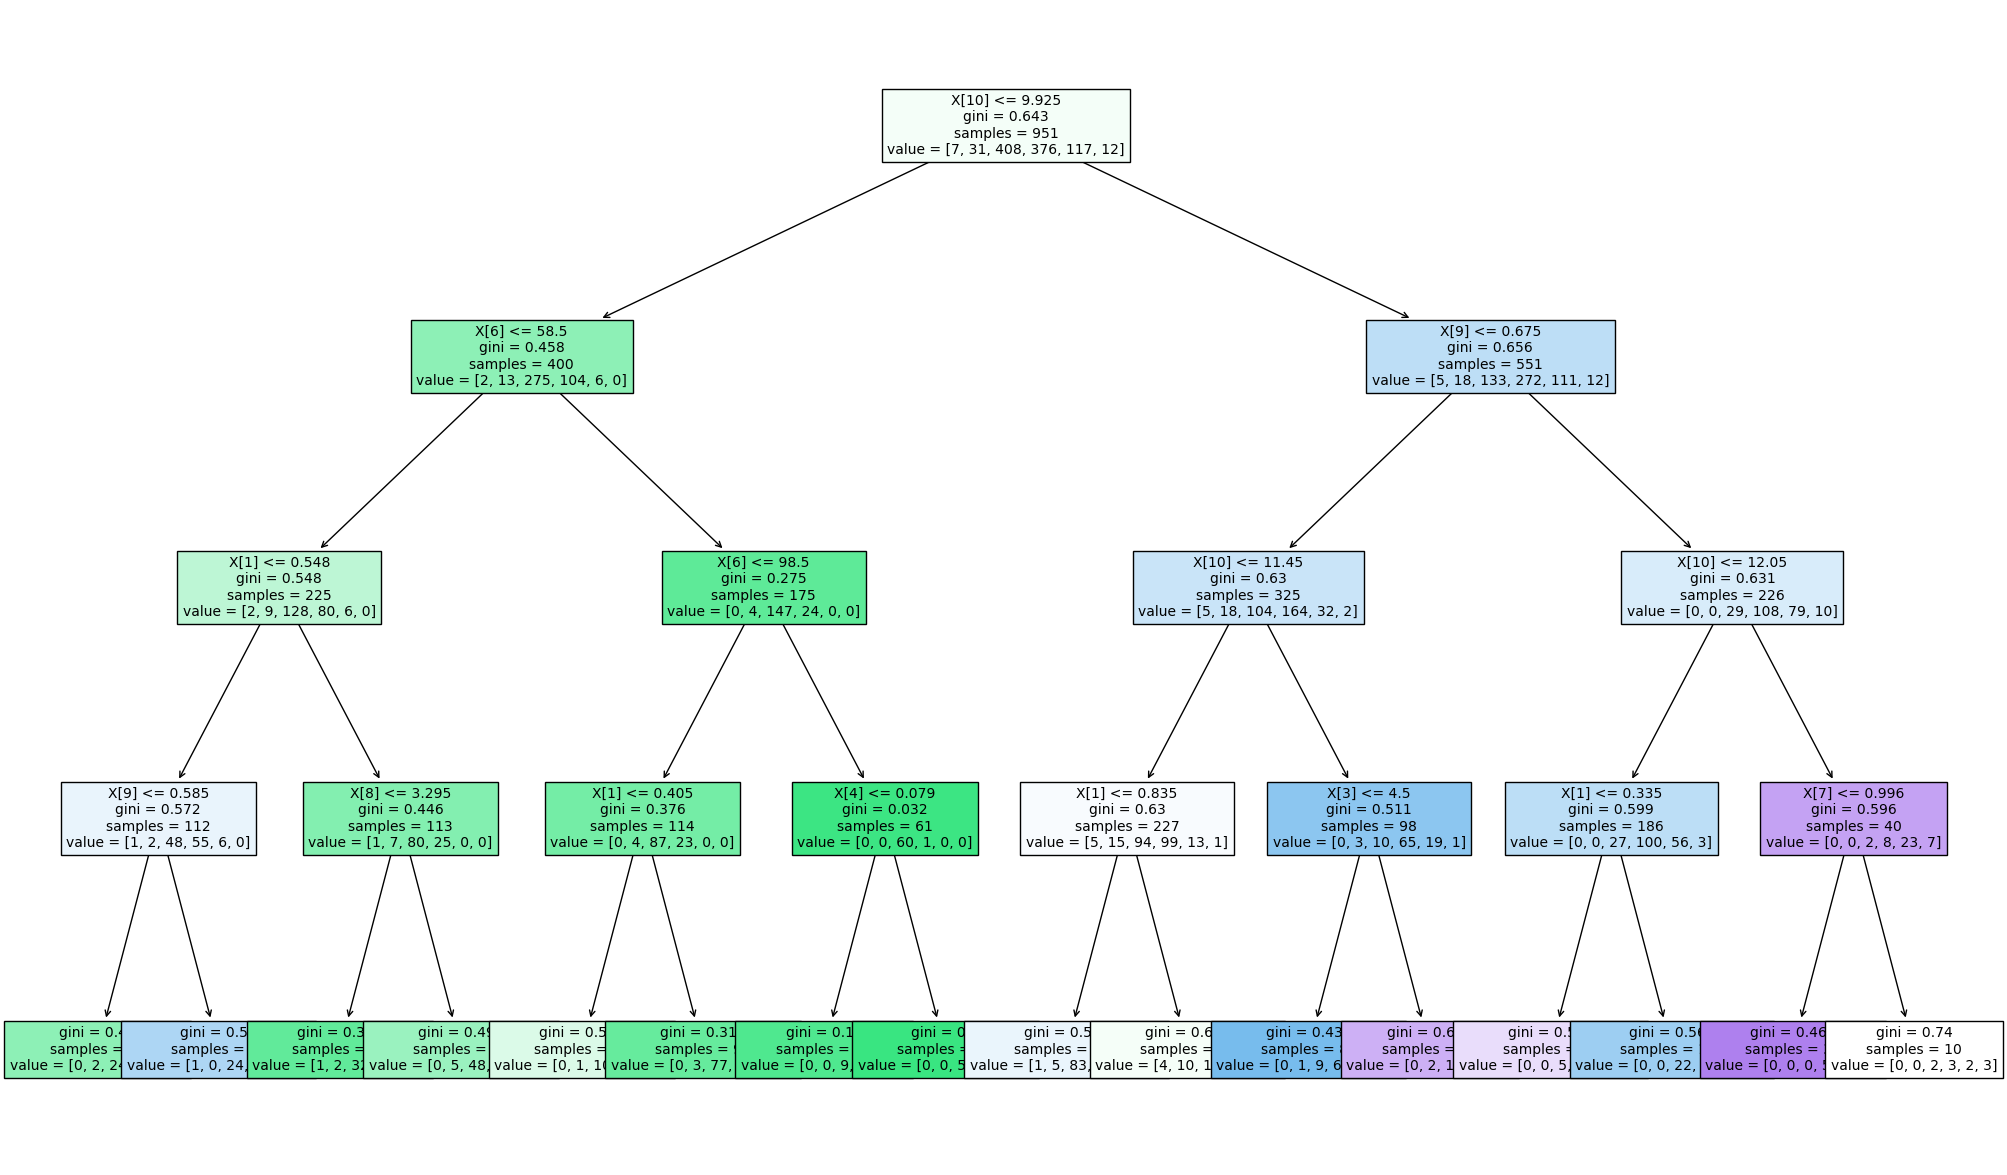

In [40]:
from sklearn import tree
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(25,15))
tree.plot_tree(model_with_best_params,filled=True,fontsize=10)

In [41]:
y_prediction2=model_with_best_params.predict(X_test)

In [42]:
accuracy_score(y_test,y_prediction2)

0.5245098039215687